In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
from skimage import io
from skimage.color import rgb2gray
import numpy as np

In [74]:
img = mpimg.imread('squares.jpg')
img = np.uint8(rgb2gray(img) * 255)

In [75]:
# thresholding
threshold = int(input("Enter Threshold: "))

imgt = img.copy()
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if imgt[i, j] > threshold:
      imgt[i, j] = 255
    else:
      imgt[i, j] = 0

Enter Threshold: 100


In [76]:
# making structuring element
sz = 5
se = np.ones((sz, sz))*255

mid = int((sz-1)/2)

In [77]:
img_eroded = imgt.copy()
she = img_eroded.shape

for row in range(mid, she[0]-mid):
  for col in range(mid, she[1]-mid):
    temp = imgt[row-mid:row+mid+1, col-mid:col+mid+1]
    if np.array_equal(temp, se):
      img_eroded[row, col] = 255
    else:
      img_eroded[row, col] = 0

In [78]:
img_dilated = imgt.copy()
shd = img_dilated.shape

for row in range(mid, shd[0]-mid):
  for col in range(mid, shd[1]-mid):
    temp = imgt[row-mid:row+mid+1, col-mid:col+mid+1]
    if np.isin(255, temp):
      img_dilated[row, col] = 255
    else:
      img_dilated[row, col] = 0

(-0.5, 884.5, 534.5, -0.5)

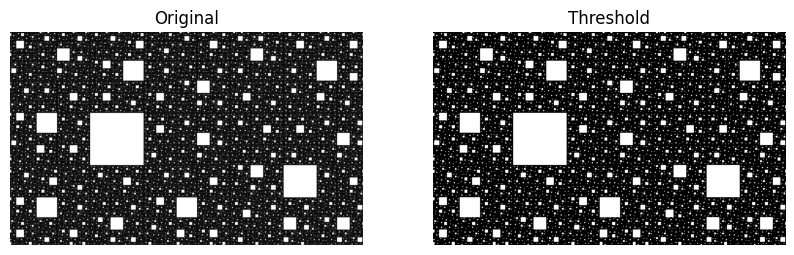

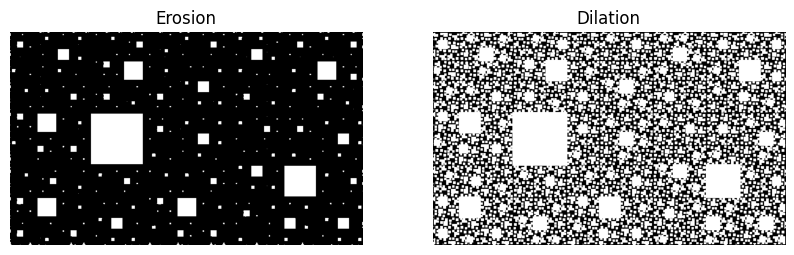

In [79]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Threshold')
plt.imshow(imgt, cmap = 'gray')
plt.axis('off')

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Erosion')
plt.imshow(img_eroded, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Dilation')
plt.imshow(img_dilated, cmap = 'gray')
plt.axis('off')